In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import csv
import time
import scipy
import scipy.io
import scipy.sparse as sp

In [29]:
from helpers import load_data, preprocess_data

path_dataset = "data_train.csv"
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


In [93]:
num_items, num_users = ratings.shape
user_train_mean = np.array([])
#calculates the mean for every movie
for user_index in range(num_users):
    # find the non-zero ratings for each user in the training dataset
    train_ratings = ratings[:, user_index]
    nonzeros_train_ratings = train_ratings[train_ratings.nonzero()]

    # calculate the mean if the number of elements is not 0
    if nonzeros_train_ratings.shape[0] != 0:
        user_train_mean = np.append(user_train_mean, nonzeros_train_ratings.mean() )

    else:
        user_train_mean.append(3)
        print("exeption found \n")
        continue
#user_train_mean has the mean value for each movie
np.shape(user_train_mean)

(1000,)

In [92]:
item_train_mean = np.array([])
#calculates the mean for every user    
for item_index in range(num_items):
    # find the non-zero ratings for each item in the training dataset
    train_ratings = ratings[item_index, :]
    nonzeros_train_ratings = train_ratings[train_ratings.nonzero()]

    # calculate the mean if the number of elements is not 0
    if nonzeros_train_ratings.shape[0] != 0:
        item_train_mean = np.append(item_train_mean, nonzeros_train_ratings.mean())
    else:
        item_train_mean.append(3)
        print("exeption found \n")
        continue
#item_train_mean has the mean values for each user
np.shape(item_train_mean)

(10000,)

In [91]:
item_train_mean

array([4.04347826, 3.77181208, 3.52325581, ..., 3.56097561, 3.8372093 ,
       3.97368421])

In [86]:
np.shape(user_train_mean)

(1000,)

In [71]:
#detrmines which ID we need in our model
ids_text = np.genfromtxt("examples_sample_submission.csv", delimiter=",", skip_header=1, dtype=str, usecols=0)

In [110]:
def get_ids():
    """
    gets the idea for which we want to estimate the ratings
    returns ids array (n,2) where, 1rs col is r and 2nd is c
    """
    #fucntion transform r23c890 to 23, 890
    def deal_line(line):
        row, col = line.split('_')
        row = row.replace("r", "")
        col = col.replace("c", "")
        return int(row), int(col)
    
    #determines which ID we need in our model
    ids_text = np.genfromtxt("examples_sample_submission.csv", delimiter=",", skip_header=1, dtype=str, usecols=0)
    
    # parse each line
    ids = [deal_line(line) for line in ids_text]
    
    return ids


In [112]:
ids = get_ids()
ids

[(37, 1),
 (73, 1),
 (156, 1),
 (160, 1),
 (248, 1),
 (256, 1),
 (284, 1),
 (400, 1),
 (416, 1),
 (456, 1),
 (474, 1),
 (495, 1),
 (515, 1),
 (518, 1),
 (521, 1),
 (559, 1),
 (596, 1),
 (614, 1),
 (621, 1),
 (661, 1),
 (697, 1),
 (710, 1),
 (713, 1),
 (732, 1),
 (807, 1),
 (824, 1),
 (926, 1),
 (951, 1),
 (1000, 1),
 (1141, 1),
 (1146, 1),
 (1157, 1),
 (1184, 1),
 (1248, 1),
 (1258, 1),
 (1283, 1),
 (1293, 1),
 (1309, 1),
 (1377, 1),
 (1434, 1),
 (1494, 1),
 (1540, 1),
 (1600, 1),
 (1634, 1),
 (1678, 1),
 (1691, 1),
 (1788, 1),
 (1803, 1),
 (1822, 1),
 (1922, 1),
 (1935, 1),
 (1939, 1),
 (1985, 1),
 (2068, 1),
 (2096, 1),
 (2102, 1),
 (2192, 1),
 (2227, 1),
 (2232, 1),
 (2236, 1),
 (2274, 1),
 (2278, 1),
 (2280, 1),
 (2289, 1),
 (2322, 1),
 (2331, 1),
 (2332, 1),
 (2395, 1),
 (2405, 1),
 (2458, 1),
 (2478, 1),
 (2489, 1),
 (2581, 1),
 (2641, 1),
 (2713, 1),
 (2743, 1),
 (2760, 1),
 (2787, 1),
 (2822, 1),
 (2894, 1),
 (2901, 1),
 (2948, 1),
 (2950, 1),
 (3001, 1),
 (3054, 1),
 (3120, 1)

In [74]:
#fucntion transform r23c890 to 23, 890
def deal_line(line):
    row, col = line.split('_')
    row = row.replace("r", "")
    col = col.replace("c", "")
    return int(row), int(col)


# parse each line
ids = [deal_line(line) for line in ids_text]


In [75]:
print(ids_text)

['r37_c1' 'r73_c1' 'r156_c1' ... 'r9978_c1000' 'r9982_c1000' 'r9996_c1000']


In [94]:
#creates the submission file and puts in the values we want
with open("averageOfMeanMovieAndUser.csv", 'w') as csvfile:
    fieldnames = ['Id', 'Prediction']
    writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
    i=0
    for r, c in ids:
        writer.writerow({'Id':ids_text[i],'Prediction':int((user_train_mean[c-1] + item_train_mean[r-1])/2)})
        i+=1

In [ ]:
#useless function
def create_csv_submission(data):
    """
    Creates an output file in csv format for submission to kaggle
    Arguments: data ()
    """
    with open(name, 'w') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({'Id':int(r1),'Prediction':int(r2)})

In [ ]:
#Plot the number of ratings per movie and user

(10000,) (1000,)


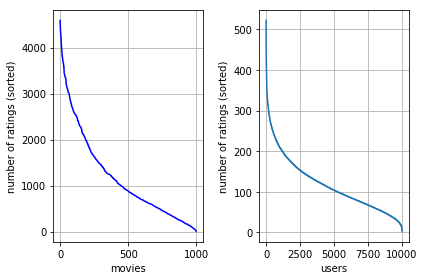

min # of items per user = 3, min # of users per item = 8.


In [106]:
#from plots import plot_raw_data

def plot_raw_data(ratings):
    """plot the statistics result on raw rating data."""
    # do statistics.
    num_users_per_item = np.array((ratings != 0).sum(axis=0)).flatten()
    num_items_per_user = np.array((ratings != 0).sum(axis=1).T).flatten()
    sorted_num_movies_per_user = np.sort(num_items_per_user)[::-1]
    sorted_num_users_per_movie = np.sort(num_users_per_item)[::-1]
    print(np.shape(sorted_num_movies_per_user), np.shape(sorted_num_users_per_movie))

    # plot
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(sorted_num_users_per_movie, color='blue')
    ax1.set_xlabel("movies")
    ax1.set_ylabel("number of ratings (sorted)")
    ax1.grid()

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(sorted_num_movies_per_user)
    ax2.set_xlabel("users")
    ax2.set_ylabel("number of ratings (sorted)")
    ax2.set_xticks(np.arange(0, 10001, 2500))
    ax2.grid()

    plt.tight_layout()
    plt.savefig("stat_ratings")
    plt.show()
    # plt.close()
    return num_items_per_user, num_users_per_item


num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

In [107]:
def split_data(ratings, num_items_per_user, num_users_per_item,
               min_num_ratings, p_test=0.1):
    """split the ratings to training data and test data.
    Args:
        min_num_ratings: 
            all users and items we keep must have at least min_num_ratings per user and per item. 
    """
    # set seed
    np.random.seed(988)
    
    # select user and item based on the condition.
    valid_users = np.where(num_items_per_user >= min_num_ratings)[0]
    valid_items = np.where(num_users_per_item >= min_num_ratings)[0]
    valid_ratings = ratings[valid_items, :][: , valid_users]  
    
    # init
    num_rows, num_cols = valid_ratings.shape
    train = sp.lil_matrix((num_rows, num_cols))
    test = sp.lil_matrix((num_rows, num_cols))
    
    print("the shape of original ratings. (# of row, # of col): {}".format(
        ratings.shape))
    print("the shape of valid ratings. (# of row, # of col): {}".format(
        (num_rows, num_cols)))

    nz_items, nz_users = valid_ratings.nonzero()
    
    # split the data
    for user in set(nz_users):
        # randomly select a subset of ratings
        row, col = valid_ratings[:, user].nonzero()
        selects = np.random.choice(row, size=int(len(row) * p_test))
        residual = list(set(row) - set(selects))

        # add to train set
        train[residual, user] = valid_ratings[residual, user]

        # add to test set
        test[selects, user] = valid_ratings[selects, user]

    print("Total number of nonzero elements in origial data:{v}".format(v=ratings.nnz))
    print("Total number of nonzero elements in train data:{v}".format(v=train.nnz))
    print("Total number of nonzero elements in test data:{v}".format(v=test.nnz))
    return valid_ratings, train, test

In [109]:
from helpers import load_data, preprocess_data

path_dataset = "data_train.csv"
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


In [108]:
from plots import plot_train_test_data

valid_ratings, train, test = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)
plot_train_test_data(train, test)

IndexError: column index (1000) out of bounds

In [18]:
from helpers import calculate_mse

def baseline_global_mean(train, test):
    """baseline method: use the global mean."""
    # find the non zero ratings in the train
    nonzero_train = train[train.nonzero()]

    # calculate the global mean
    global_mean_train = nonzero_train.mean()

    # find the non zero ratings in the test
    nonzero_test = test[test.nonzero()].todense()

    # predict the ratings as global mean
    mse = calculate_mse(nonzero_test, global_mean_train)
    rmse = np.sqrt(1.0 * mse / nonzero_test.shape[1])
    print("test RMSE of baseline using the global mean: {v}.".format(v=rmse))

baseline_global_mean(train, test)

test RMSE of baseline using the global mean: [[1.12152228]].


In [19]:
def baseline_user_mean(train, test):
    """baseline method: use the user means as the prediction."""
    mse = 0
    num_items, num_users = train.shape

    for user_index in range(num_users):
        # find the non-zero ratings for each user in the training dataset
        train_ratings = train[:, user_index]
        nonzeros_train_ratings = train_ratings[train_ratings.nonzero()]
        
        # calculate the mean if the number of elements is not 0
        if nonzeros_train_ratings.shape[0] != 0:
            user_train_mean = nonzeros_train_ratings.mean()
        else:
            continue
        
        # find the non-zero ratings for each user in the test dataset
        test_ratings = test[:, user_index]
        nonzeros_test_ratings = test_ratings[test_ratings.nonzero()].todense()
        
        # calculate the test error 
        mse += calculate_mse(nonzeros_test_ratings, user_train_mean)
    rmse = np.sqrt(1.0 * mse / test.nnz)
    print("test RMSE of the baseline using the user mean: {v}.".format(v=rmse))

baseline_user_mean(train, test)

test RMSE of the baseline using the user mean: [[1.03317038]].


In [17]:
valid_ratings

<9990x999 sparse matrix of type '<class 'numpy.float64'>'
	with 1176873 stored elements in LInked List format>

ValueError: DataFrame constructor not properly called!

  (0, 3)	3.0
  (0, 5)	5.0
  (0, 7)	4.0
  (0, 21)	5.0
  (0, 31)	5.0
  (0, 33)	4.0
  (0, 43)	4.0
  (0, 44)	3.0
  (0, 47)	4.0
  (0, 59)	3.0
  (0, 60)	4.0
  (0, 69)	2.0
  (0, 71)	4.0
  (0, 80)	4.0
  (0, 88)	5.0
  (0, 92)	3.0
  (0, 94)	4.0
  (0, 101)	5.0
  (0, 134)	1.0
  (0, 137)	2.0
  (0, 143)	2.0
  (0, 160)	3.0
  (0, 168)	2.0
  (0, 172)	3.0
  (0, 176)	2.0
  (0, 181)	4.0
  (0, 187)	4.0
  (0, 190)	4.0
  (0, 212)	5.0
  (0, 214)	5.0
  (0, 219)	3.0
  (0, 221)	5.0
  (0, 225)	3.0
  (0, 227)	2.0
  (0, 239)	3.0
  (0, 256)	4.0
  (0, 257)	5.0
  (0, 282)	2.0
  (0, 284)	2.0
  (0, 287)	1.0
  (0, 294)	3.0
  (0, 303)	4.0
  (0, 305)	4.0
  (0, 309)	3.0
  (0, 313)	5.0
  (0, 316)	5.0
  (0, 336)	2.0
  (0, 337)	3.0
  (0, 349)	5.0
  (0, 362)	3.0
  (0, 364)	4.0
  (0, 365)	5.0
  (0, 367)	3.0
  (0, 375)	4.0
  (0, 384)	4.0
  (0, 387)	4.0
  (0, 395)	4.0
  (0, 396)	3.0
  (0, 401)	5.0
  (0, 433)	5.0
  (0, 439)	1.0
  (0, 442)	3.0
  (0, 443)	1.0
  (0, 456)	4.0
  (0, 457)	3.0
  (0, 458)	4.0
  (0, 464)	5.0
  (0, 474)	5.0
